<a href="https://colab.research.google.com/github/SushmithaDhaipule/ML_Image_Classification/blob/main/ML_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.98 ms (started: 2021-06-16 09:45:26 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 2.74 s (started: 2021-06-16 09:45:45 +00:00)


In [ ]:
!mkdir '/content/drive/MyDrive/dataset'

mkdir: cannot create directory ‘/content/drive/MyDrive/dataset’: No such file or directory
time: 121 ms (started: 2021-06-16 09:46:04 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("Noodles",limit=30,output_dir='/content/drive/MyDrive/dataset',adult_filter_off=True)


[%] Downloading Images to /content/drive/MyDrive/dataset/Noodles


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://images.happycow.net/venues/1024/85/29/hcmp85298_596364.jpeg
[Error]Invalid image, not saving https://images.happycow.net/venues/1024/85/29/hcmp85298_596364.jpeg

[!] Issue getting: https://images.happycow.net/venues/1024/85/29/hcmp85298_596364.jpeg
[!] Error:: Invalid image, not saving https://images.happycow.net/venues/1024/85/29/hcmp85298_596364.jpeg

[%] Downloading Image #1 from https://hankstruebbq.com/wp-content/uploads/2015/03/thai_noodles-1000x1000.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.triedandtruerecipe.com/wp-content/uploads/2019/10/Spicy-Pork-and-Soba-Noodles_MidPage.png
[%] File Downloaded !

[%] Downloading Image #3 from https://trueforage.com/wp-content/uploads/kelp-noodles-vegan-pesto-leaves-true-forage.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://truefoodfact.c

In [ ]:
downloader.download("Monkey",limit=30,output_dir='/content/drive/MyDrive/dataset',adult_filter_off=True)


[%] Downloading Images to /content/drive/MyDrive/dataset/Monkey


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/cGU_bmr1nFo/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/i_QAdiaqRxQ/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/70/65/d9/7065d92d2af2812bde489fd4204fd7ce.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/V0BTqWWIcNk/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://thetruejapan.com/wp-content/uploads/2017/01/Monkey-Park-Iwatayama-Monkeys.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ytimg.com/vi/FjsqAkokaJg/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://thetruejapan.com/wp-content/uploads/2017/01/Monkey-Park-Iwatayama-Baby-Monkey.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://the

(60, 67500)


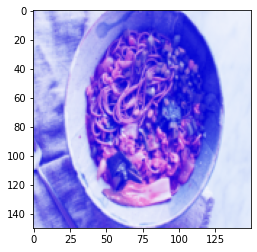

time: 26.9 s (started: 2021-06-16 09:47:35 +00:00)


In [ ]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/dataset'
CATEGORIES = ['Monkey','Noodles']

for category in CATEGORIES :
    class_num = CATEGORIES.index(category)#label encoding the values
    path  = os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_array = imread(os.path.join(path,img))
      #print(img_array.shape)
      #plt.imshow(img_array)
      img_resized = resize(img_array,(150,150,3))#normalizes the value form 0 to 1
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(class_num)
      plt.imshow(img_resized)
      plt.show
flat_data = np.array(flat_data)
target = np.array(target)
image = np.array(images)
print(flat_data.shape)

In [ ]:
flat_data[0]

array([0.36667974, 0.56405229, 0.54509804, ..., 0.79542484, 0.83856209,
       0.84640523])

time: 6.05 ms (started: 2021-06-16 09:48:15 +00:00)


In [ ]:
target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 8.71 ms (started: 2021-06-16 09:48:44 +00:00)


<BarContainer object of 2 artists>

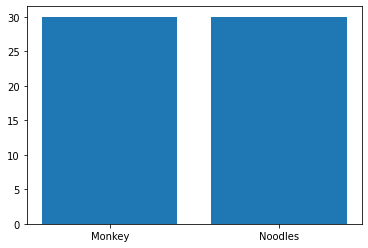

time: 136 ms (started: 2021-06-16 09:49:02 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
#Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


time: 229 ms (started: 2021-06-16 09:49:15 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
param_grid = [
              {'C':[1,10,100,1000],'kernal':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernal':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
for kernel in ('linear', 'rbf', 'poly'):
   clf = svm.SVC(kernel=kernel, gamma= 'auto')
   clf.fit(x_train, y_train)
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 793 ms (started: 2021-06-16 09:49:42 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 78.7 ms (started: 2021-06-16 09:49:56 +00:00)


In [ ]:
y_test


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 5.39 ms (started: 2021-06-16 09:50:29 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.23 ms (started: 2021-06-16 09:50:47 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.3888888888888889

time: 5.87 ms (started: 2021-06-16 09:50:59 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 0,  0],
       [11,  7]])

time: 7.24 ms (started: 2021-06-16 09:51:19 +00:00)



**Logistic regression**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)


time: 35.8 ms (started: 2021-06-16 09:52:21 +00:00)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred # Predicted Value

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 1.76 s (started: 2021-06-16 09:52:42 +00:00)


In [ ]:
model.score(x_test,y_test)

1.0

time: 13.8 ms (started: 2021-06-16 09:53:20 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  7]])

time: 4.27 ms (started: 2021-06-16 09:53:29 +00:00)


Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/7/73/Mama_instant_noodle_block.jpg
(2560, 2560, 3)
PREDICTED OUTPUT:Noodles


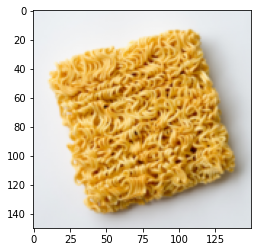

time: 53.2 s (started: 2021-06-16 09:53:47 +00:00)


In [ ]:
#Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')